In [ ]:
import numpy as np
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=4,n_classes=2)
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.1)


In [ ]:
def standardize(X_tr):
  for i in range(shape(X_tr)[1]):
    X_tr[:,i]=(X_tr[:,i]-np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [ ]:
class LogisticRegression:
    def sigmoid(self, Z):
        sig = 1 / (1 + np.exp(-Z))
        return sig

    def initialize(self, X):
        weights = np.zeros((X.shape[1] + 1, 1))
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)

        def cost(theta):
            z = np.dot(X, theta)
            cost0 = y.T.dot(np.log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z)))
            cost = ((cost1 + cost0)) / len(y)
            return cost

        cost_list = np.zeros(iter)
        for i in range(iter):
            weights = weights - alpha * np.dot(X.T, (self.sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1))))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list

    def predict(self, X):
        z = np.dot(self.initialize(X)[1], self.weights)
        predictions = self.sigmoid(z)
        predictions = [1 if i > 0.5 else 0 for i in predictions]
        return predictions

standardize(X_tr)
standardize(X_te)

obj1 = LogisticRegression()
model = obj1.fit(X_tr, y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)


<ipython-input-24-9382303b0408>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


In [ ]:
def f1_score(y,y_hat):
  tp,tn,fp,fn=0,0,0,0
  for i in range(len(y)):
    if y[i]==1 and y_hat[i]==1:
      tp +=1
    elif y[i] == 1 and y_hat[i]==0:
      fn +=1
    elif y[i] == 0 and y_hat[i]==1:
      fp+=1
    elif y[i] ==0 and y_hat[i] == 0:
      tn += 1
  precision = tp/(tp+fp)
  recall=tp/(tp+fn)
  f1_score=2*precision*recall/(precision + recall)
  return f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

0.9090909090909091


IRIS DATASET

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y= iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(random_state=0,multi_class = 'auto')
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.9555555555555556


In [ ]:
#regularisation
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

weights,params= [],[]
for c in range(0,5):
  lr = LogisticRegression(C=10**c,random_state=0)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights= np.array(weights)


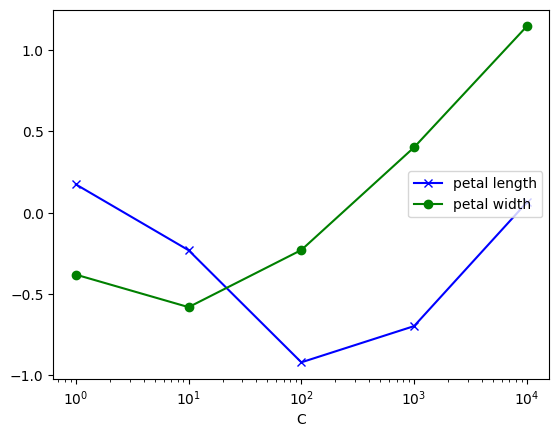

In [ ]:
#Decision region drawing
import matplotlib.pyplot as plt
plt.plot(params,weights[:,0],color='blue',marker='x',label='petal length')
plt.plot(params,weights[:,1],color='green',marker='o',label='petal width')
plt.xlabel('C')
plt.legend(loc = 'right')
plt.xscale('log')
plt.show()

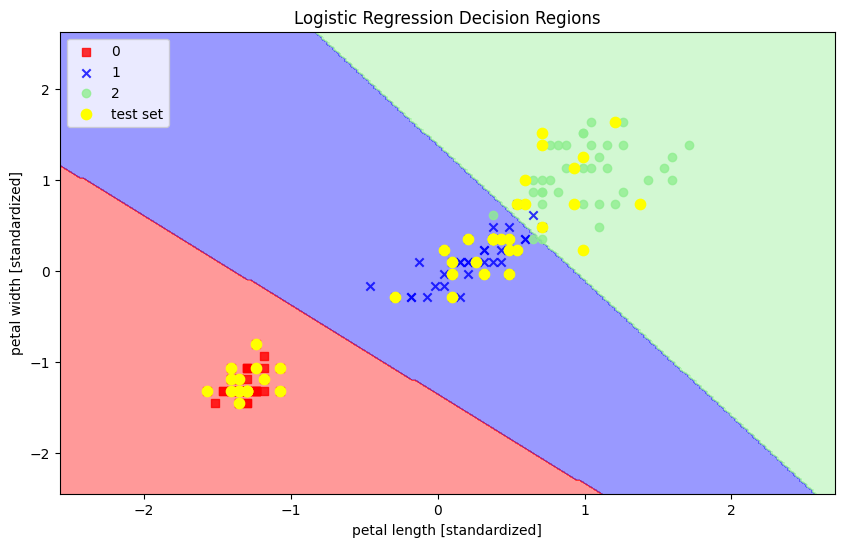

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Load the Iris dataset and prepare the data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train a Logistic Regression model
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='yellow',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')

# Combine training and test sets for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Logistic Regression Decision Regions')
plt.show()